In [71]:
# Imports
import os # Para trabalhar com o sistema operacional
import pandas as pd 
import sqlite3 as sql
import matplotlib.pyplot as plt

In [72]:
#pip install prettytable==3.6.0

In [73]:
%reload_ext watermark
%watermark -a "Guilherme José Silva"

Author: Guilherme José Silva



In [74]:
%watermark --iversion

sqlite3   : 2.6.0
pandas    : 2.2.2
matplotlib: 3.9.2



# Criando o banco de dados Relacional

### Teste1 - Dados sintéticos

In [75]:
#!pip install -q ipython-sql | Para trabalhar com instruções SQL

In [76]:
# Criando dados sintéticos paara testar
dados = pd.DataFrame({'nivel': ['Junior','Pleno','Senior'],
                      'salario': [7500 ,14650 , 18320],
                      'cargo': ['Analista de dados', 'Cientita de dados', 'Engenheiro de dados']})

In [77]:
dados

,nivel,salario,cargo
0,Junior,7500,Analista de dados
1,Pleno,14650,Cientita de dados
2,Senior,18320,Engenheiro de dados


In [78]:
# Caminho para o banco de dados
caminho = 'database_dsa.db'

In [79]:
# Criando um banco de dados
cnn = sql.connect(caminho)
cnn.close()


In [80]:
# Tenta fechar a conexão se estiver aberta
try:
    cnn.close()
except:
    pass

# Tenta remover o arquivo
if os.path.exists(caminho):
    try:
        os.remove(caminho)
        print(f"Arquivo {caminho} deletado com sucesso!")
    except PermissionError:
        print(f"Erro: o arquivo {caminho} está em uso. Feche todas as conexões antes de deletar.")
else:
    print(f"Arquivo {caminho} não encontrado!")


Erro: o arquivo database_dsa.db está em uso. Feche todas as conexões antes de deletar.


In [81]:
cnn =sql.connect('database_dsa.db')

In [83]:
# carregando os dados no banco de dados

dados.to_sql('Funcionarios', cnn, if_exists='replace', index=False)

3

In [87]:
# Extensão para conseguirmos trabalhar com instruções SQL
%reload_ext sql

In [88]:
%sql sqlite:///database_dsa.db

In [97]:
%%sql
SELECT * FROM Funcionarios;

 * sqlite:///database_dsa.db
Done.


nivel,salario,cargo
Junior,7500,Analista de dados
Pleno,14650,Cientita de dados
Senior,18320,Engenheiro de dados


In [98]:
%%sql
SELECT COUNT(*) AS "Qtd de funcionarios" FROM Funcionarios

 * sqlite:///database_dsa.db
Done.


Qtd de funcionarios
3


In [99]:
%%sql
SELECT
    ROUND(AVG(salario),1) AS "Media de Salario", 
    MAX(salario) AS "Maior Valor", 
    MIN(salario) AS "Menor Valor"

FROM Funcionarios

 * sqlite:///database_dsa.db
Done.


Media de Salario,Maior Valor,Menor Valor
13490.0,18320,7500


### TESTE2 - Com dados reais

In [102]:
dados = pd.read_csv('dataset.csv')

In [103]:
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,103,30,38,83,43.3,0.183,33,0
1,1,115,70,30,96,34.6,0.529,32,1
2,3,126,88,41,235,39.3,0.704,27,0
3,8,99,84,0,0,35.4,0.388,50,0
4,7,196,90,0,0,39.8,0.451,41,1


In [104]:
# Criando a tabela no banco de dados
dados.to_sql('Gravidas',cnn)

768

In [110]:
%%sql
SELECT COUNT(*) as Qtd_registros FROM Gravidas

 * sqlite:///database_dsa.db
Done.


Qtd_registros
768


In [111]:
# Aplicando linguagem ptthon pura para filtrar
dados[(dados["BMI"] > 53) & (dados["Age"] >= 25) & (dados["Age"] <= 30)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
445,0,180,78,63,14,59.4,2.420,25,1


In [112]:
# Aplicando a função query do pandas para realizar o mesmo filtro
dados.query("BMI > 53 and 25 <= Age <=30").reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,120,0,162,76,56,100,53.2,0.759,25,1
1,125,1,88,30,42,99,55.0,0.496,26,1
2,177,0,129,110,46,130,67.1,0.319,26,1
3,445,0,180,78,63,14,59.4,2.420,25,1


In [113]:
# Aplicando linguagem SQL diretamente para realziar o mesmo filtro

In [114]:
%%sql 
SELECT * FROM Gravidas WHERE BMI > 52 AND Age between 25 AND 30

 * sqlite:///database_dsa.db
Done.


index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
303,5,115,98,0,0,52.9,0.209,28,1
445,0,180,78,63,14,59.4,2.42,25,1


In [115]:
# Filtrando as pacientes maior que 50 anos
dados_filtrados = dados.query("Age > 50")

In [117]:
# Criando uma regra para classificar o IMC (BMI)
dados_filtrados.loc[:,'Classificacao'] = dados_filtrados.apply(lambda x: "Normal" if x['BMI'] < 30 else "Obeso", axis=1)

#### Aplicando mais algumas instruções SQL

In [121]:
%%sql
SELECT * FROM Gravidas
WHERE Age > 50

 * sqlite:///database_dsa.db
Done.


index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,2,197,70,45,543,30.5,0.158,53,1
14,8,125,96,0,0,0.0,0.232,54,1
17,10,139,80,0,0,27.1,1.441,57,0
18,1,189,60,23,846,30.1,0.398,59,1
19,5,166,72,19,175,25.8,0.587,51,1
24,11,143,94,33,146,36.6,0.254,51,1
28,13,145,82,19,110,22.2,0.245,57,0
30,5,109,75,26,0,36.0,0.546,60,0
39,4,111,72,47,207,37.1,1.39,56,1
43,9,171,110,24,240,45.4,0.721,54,1


In [122]:
%%sql
CREATE TABLE pacientes(Pregnancies,
                      Glucose
                      ,BloodPressure,
                      SkinThickness,
                      Insulin,
                      BMI,
                      DiabetesPedigreeFunction,
                      Age,
                      Outcome)

 * sqlite:///database_dsa.db
Done.


[]

In [123]:
%%sql
SELECT * FROM pacientes

 * sqlite:///database_dsa.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [124]:
%%sql
INSERT INTO pacientes(Pregnancies,
                      Glucose
                      ,BloodPressure,
                      SkinThickness,
                      Insulin,
                      BMI,
                      DiabetesPedigreeFunction,
                      Age,
                      Outcome)
SELECT 
Pregnancies,
Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI,
DiabetesPedigreeFunction,
Age,
Outcome 
FROM Gravidas
WHERE Age > 50;

 * sqlite:///database_dsa.db
81 rows affected.


[]

In [125]:
%%sql
SELECT * FROM pacientes
WHERE Age > 50;

 * sqlite:///database_dsa.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
11,143,94,33,146,36.6,0.254,51,1
13,145,82,19,110,22.2,0.245,57,0
5,109,75,26,0,36.0,0.546,60,0
4,111,72,47,207,37.1,1.39,56,1
9,171,110,24,240,45.4,0.721,54,1


In [126]:
%reload_ext sql

In [127]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';


 * sqlite:///database_dsa.db
Done.


name
Funcionarios
Gravidas
pacientes


In [128]:
%%sql
ALTER TABLE pacientes
ADD Classificacao VARCHAR(10);

 * sqlite:///database_dsa.db
Done.


[]

In [129]:
%%sql
SELECT * FROM pacientes

 * sqlite:///database_dsa.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Classificacao
2,197,70,45,543,30.5,0.158,53,1,None
8,125,96,0,0,0.0,0.232,54,1,None
10,139,80,0,0,27.1,1.441,57,0,None
1,189,60,23,846,30.1,0.398,59,1,None
5,166,72,19,175,25.8,0.587,51,1,None
11,143,94,33,146,36.6,0.254,51,1,None
13,145,82,19,110,22.2,0.245,57,0,None
5,109,75,26,0,36.0,0.546,60,0,None
4,111,72,47,207,37.1,1.39,56,1,None
9,171,110,24,240,45.4,0.721,54,1,None


In [130]:
%%sql
UPDATE pacientes
SET Classificacao = "Normal"
WHERE BMI < 30

 * sqlite:///database_dsa.db
38 rows affected.


[]

In [131]:
%%sql
UPDATE pacientes
SET Classificacao = "Obeso"
WHERE BMI >= 30

 * sqlite:///database_dsa.db
43 rows affected.


[]

In [132]:
%%sql
SELECT * FROM pacientes

 * sqlite:///database_dsa.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Classificacao
2,197,70,45,543,30.5,0.158,53,1,Obeso
8,125,96,0,0,0.0,0.232,54,1,Normal
10,139,80,0,0,27.1,1.441,57,0,Normal
1,189,60,23,846,30.1,0.398,59,1,Obeso
5,166,72,19,175,25.8,0.587,51,1,Normal
11,143,94,33,146,36.6,0.254,51,1,Obeso
13,145,82,19,110,22.2,0.245,57,0,Normal
5,109,75,26,0,36.0,0.546,60,0,Obeso
4,111,72,47,207,37.1,1.39,56,1,Obeso
9,171,110,24,240,45.4,0.721,54,1,Obeso


In [133]:
dados_filtrados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Classificacao
13,2,197,70,45,543,30.5,0.158,53,1,Obeso
14,8,125,96,0,0,0.0,0.232,54,1,Normal
17,10,139,80,0,0,27.1,1.441,57,0,Normal
18,1,189,60,23,846,30.1,0.398,59,1,Obeso
19,5,166,72,19,175,25.8,0.587,51,1,Normal
...,...,...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52,1,Obeso
734,2,105,75,0,0,23.3,0.560,53,0,Normal
757,0,123,72,0,0,36.3,0.258,52,1,Obeso
759,6,190,92,0,0,35.5,0.278,66,1,Obeso


In [134]:
Grapfh = dados_filtrados['Classificacao'].value_counts()

In [135]:
type(Grapfh)

pandas.core.series.Series

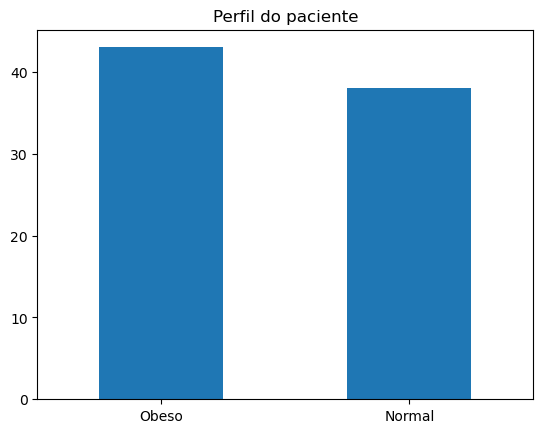

In [136]:
ax = plt.gca()
dados = Grapfh.plot(kind='bar', rot = 0)
plt.title("Perfil do paciente")
plt.xlabel("")
plt.show()

In [137]:
dsa_query = cnn.execute("SELECT * FROM pacientes")

In [138]:
dsa_query

In [139]:
cols = [col[0] for col in dsa_query.description]

In [140]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Classificacao']

In [141]:
result = pd.DataFrame.from_records(data = dsa_query.fetchall(), columns = cols)

In [142]:
result

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Classificacao
0,2,197,70,45,543,30.5,0.158,53,1,Obeso
1,8,125,96,0,0,0.0,0.232,54,1,Normal
2,10,139,80,0,0,27.1,1.441,57,0,Normal
3,1,189,60,23,846,30.1,0.398,59,1,Obeso
4,5,166,72,19,175,25.8,0.587,51,1,Normal
...,...,...,...,...,...,...,...,...,...,...
76,5,97,76,27,0,35.6,0.378,52,1,Obeso
77,2,105,75,0,0,23.3,0.560,53,0,Normal
78,0,123,72,0,0,36.3,0.258,52,1,Obeso
79,6,190,92,0,0,35.5,0.278,66,1,Obeso


In [143]:
result.to_csv('resultado.csv', index = False)

In [147]:
%watermark -a 'Guilherme'

Author: Guilherme



In [148]:
%watermark --iversion

sqlite3   : 2.6.0
pandas    : 2.2.2
matplotlib: 3.9.2



# Trabalho concluido!!!